In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Complete MultiClass Classification using Logistic Regression

In [14]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
X, y = fetch_openml('mnist_784', return_X_y=True)

In [15]:
X, y = fetch_openml('mnist_784', return_X_y=True)

In [84]:
y = y.astype(int)
X = X/255
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=True)

# Display random 100 handwritten 

In [129]:
X_train_bar = np.hstack((np.ones((len(X_train), 1)), X_train))

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

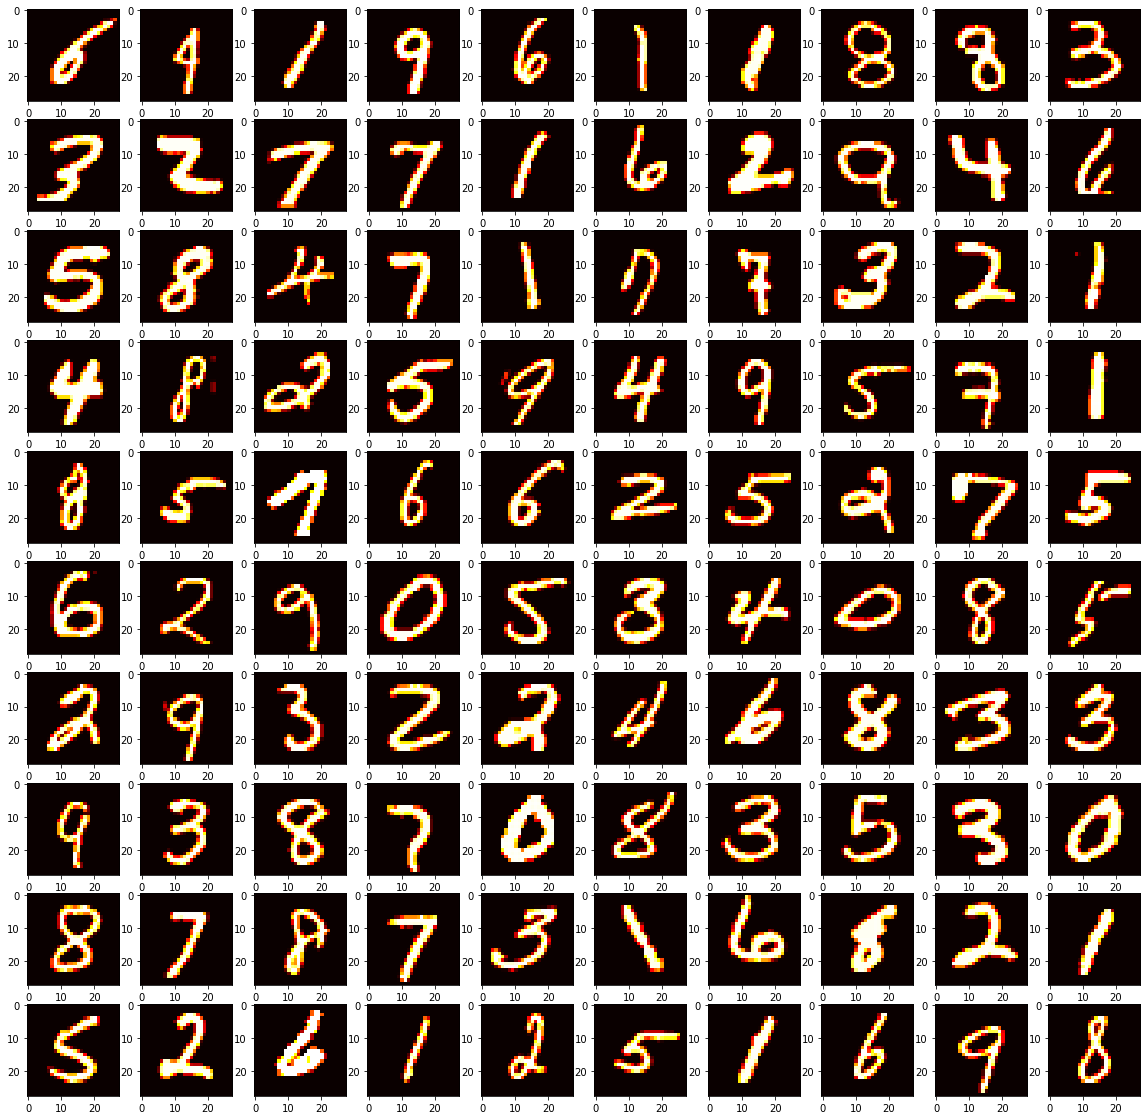

In [35]:
plt.figure(figsize=(20, 20))
random100_hw_X = X[np.random.choice(range(0, len(X)), size=100, replace=False)]
for i in range(0, 100):
    plt.subplot(10, 10, i+1)
    plt.imshow(random100_hw_X[i].reshape(28, 28), cmap=plt.cm.hot)

In [18]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [19]:
def LrCostFunction(theta, X, y, Lambda):
    m = len(y)
    predictions = sigmoid(X @ theta)
    error = sum(-y * np.log(predictions) - ((1-y) * np.log(1 - predictions)))
    cost = 1/m * error
    regCost = cost + Lambda/(2*m) * sum(theta[1:]**2)
    
    # Compute Gradient
    partial_derivation = X.T @ (sigmoid(X @ theta) - y)
    descent_1 = 1/m * partial_derivation[[0], :]
    descent_j = 1/m * partial_derivation[1:] + (Lambda/m) * theta[1:]
    grad = np.vstack((descent_1, descent_j))
    return regCost, grad

In [36]:
theta_t = np.array([-2,-1,1,2]).reshape(4,1)
X_t =np.array([np.linspace(0.1,1.5,15)]).reshape(3,5).T
X_t = np.hstack((np.ones((5,1)), X_t))
y_t = np.array([1,0,1,0,1]).reshape(5,1)
J, grad = LrCostFunction(theta_t, X_t, y_t, 3)
print("Cost:",J,"Expected cost: 2.534819")
print("Gradients:\n",grad,"\nExpected gradients:\n 0.146561\n -0.548558\n 0.724722\n 1.398003")

Cost: [2.5348194] Expected cost: 2.534819
Gradients:
 [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]] 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


In [31]:
def gradient_descent(X, y, theta, alpha, num_iters, Lambda):
    m = len(y)
    J_history = []
    
    for i in range(num_iters):
        cost, grad = LrCostFunction(theta, X, y, Lambda)
        theta =  theta - alpha * grad
        J_history.append(cost)
    return theta, J_history

In [133]:
def oneVsAll(X, y, num_labels, Lambda):
    i, j = X.shape[0], X.shape[1]
    Xbar = np.hstack((np.ones((i, 1)), X))
    init_theta = np.ones((j + 1, 1))
    all_theta = []
    all_J = []
    for i in range(0, num_labels):
        theta, J = gradient_descent(Xbar, np.where(y.flatten()==i, 1, 0).reshape((-1, 1)),init_theta, 1, 300, Lambda)
        all_theta.append(theta)
        all_J.append(J)
    return np.array(all_theta), all_J

In [134]:
all_theta, all_J = oneVsAll(X_train, y_train, 10, 0.1)

In [90]:
def predict(all_theta, labels_num, X):
    labels_prob = []
    for i in range(labels_num):
        p = sigmoid(X @ all_theta[i])
        labels_prob.append(p)
    return labels_prob.index(max(labels_prob))

In [135]:
all_theta.shape

(10, 785, 1)

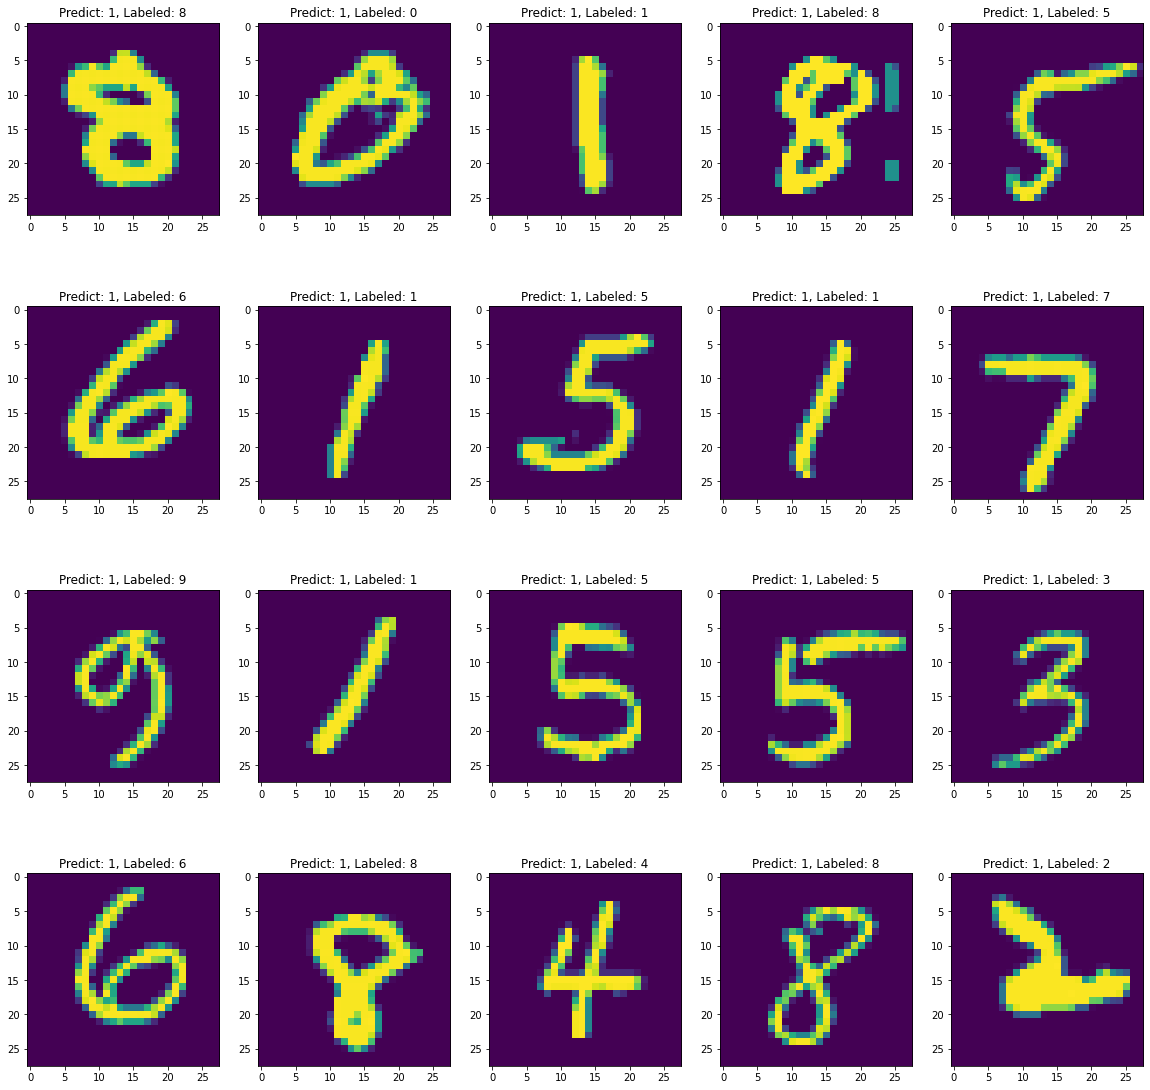

In [136]:
plot_i = 1
plt.figure(figsize=(20, 20))
X_test_bar = np.hstack((np.ones((len(X_test), 1)), X_test))
for i in np.random.choice(X_test_bar.shape[0], size=20):
    tmp_p = []
    for theta in all_theta:
        tmp_p.append(sigmoid(X_test_bar[i] @ theta))
    plt.subplot(4, 5, plot_i)
    plt.imshow(X_test[i].reshape((28, 28)))
    plt.title('Predict: {}, Labeled: {}'.format(tmp_p.index(max(tmp_p)), y_test[i]))
    plot_i += 1